<a href="https://colab.research.google.com/github/Nish-hub94/ML-for-Computer-vision/blob/main/Exercise%207%20/exe_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

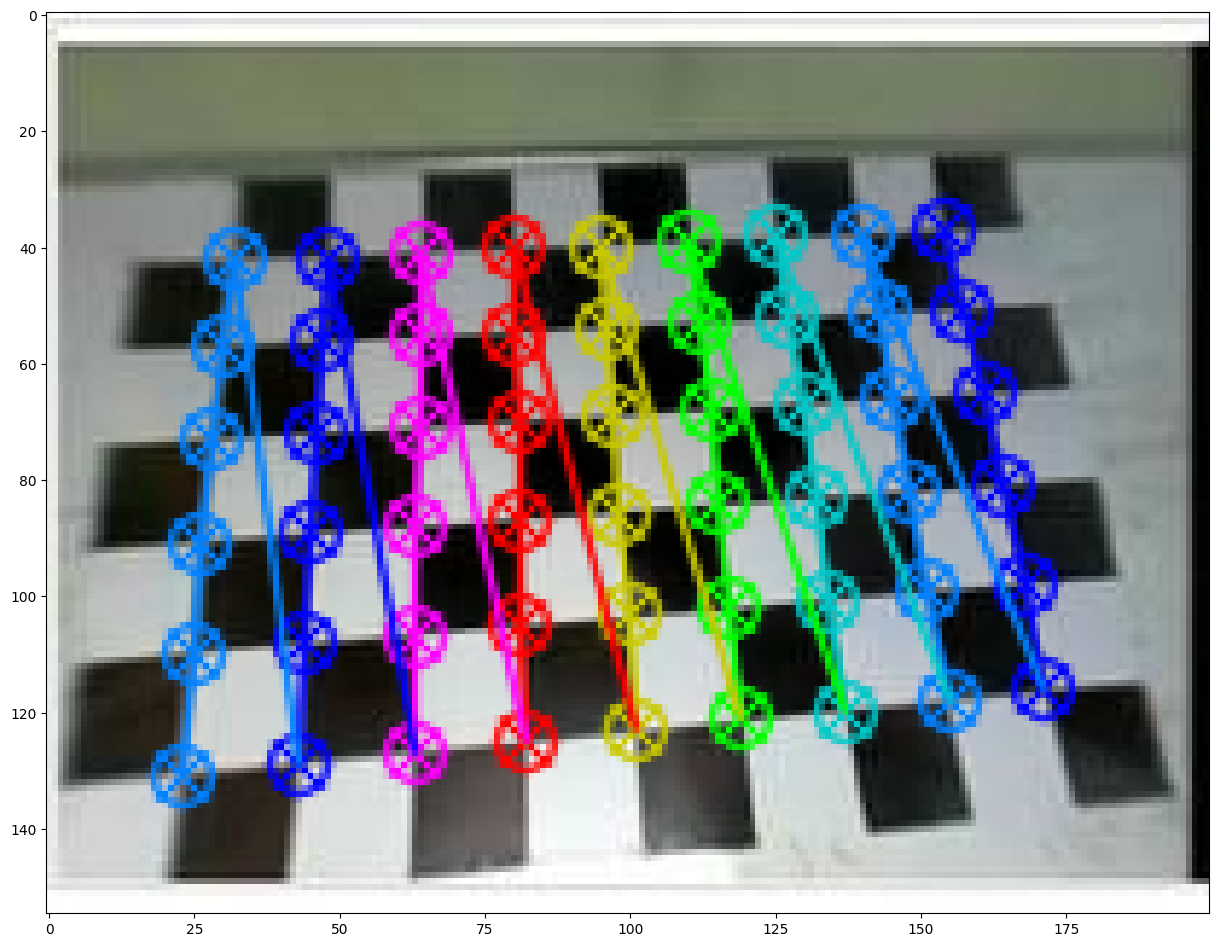

In [11]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

CHECKERBOARD = (6, 9)


criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 50, 0.0005)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None



images = glob.glob('/content/checkerboard0-200x155.jpg')

for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)


    if ret == True:
        threedpoints.append(objectp3d)

        # Refining pixel coordinates
        # for given 2d points.
        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)

        twodpoints.append(corners2)

        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image),plt.show()

h, w = image.shape[:2]
flags = (
    cv2.CALIB_ZERO_TANGENT_DIST |
    cv2.CALIB_FIX_K3 |
    cv2.CALIB_FIX_K4 |
    cv2.CALIB_FIX_K5 |
    cv2.CALIB_FIX_K6
)


ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None, flags=flags)




In [12]:
# Displaying required output for checkboard 0
print(" Camera matrix:")
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

print("\n Camera focal length (mm):")
print(((matrix[0][0] + matrix[1][1]) / 2) / 712.76)

 Camera matrix:
[[31.12427957  0.         94.71125997]
 [ 0.         29.1018341  55.2590496 ]
 [ 0.          0.          1.        ]]

 Distortion coefficient:
[[ 6.73215150e-04 -5.43165032e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]

 Rotation Vectors:
(array([[-0.07231536],
       [ 0.04350514],
       [ 1.51453794]]),)

 Translation Vectors:
(array([[ 4.0417697 ],
       [-1.3161427 ],
       [ 2.11691001]]),)

 Camera focal length (mm):
0.04224852241787483


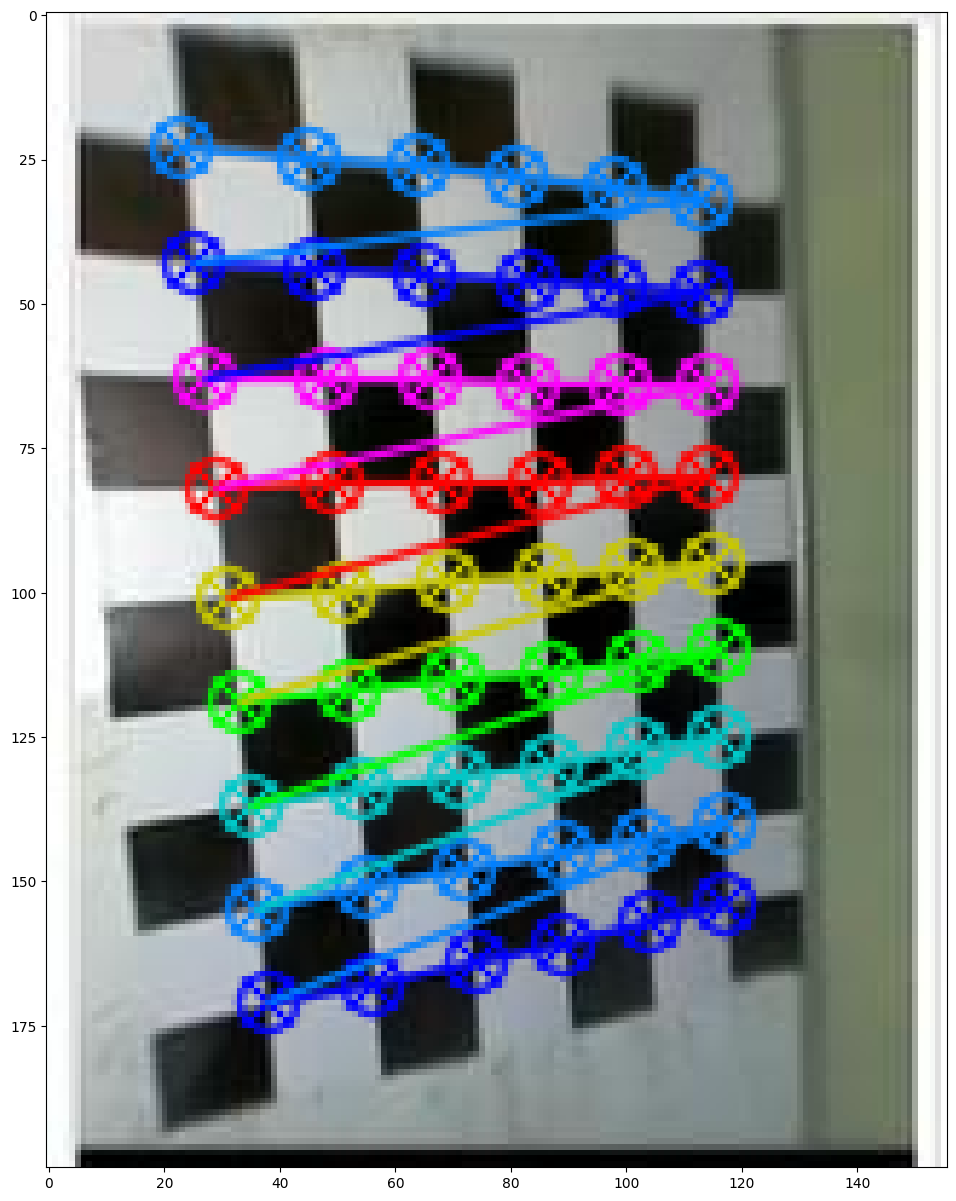

In [13]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt


CHECKERBOARD = (6, 9)


criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 50, 0.0005)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None



images = glob.glob('/content/checkerboard1-156x200.jpg')

for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)


    if ret == True:
        threedpoints.append(objectp3d)


        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)

        twodpoints.append(corners2)

        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image),plt.show()

h, w = image.shape[:2]
flags = (
    cv2.CALIB_ZERO_TANGENT_DIST |
    cv2.CALIB_FIX_K3 |
    cv2.CALIB_FIX_K4 |
    cv2.CALIB_FIX_K5 |
    cv2.CALIB_FIX_K6
)


ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None, flags=flags)


In [14]:
# Displaying required output for checkboard 1
print(" Camera matrix:")
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

print("\n Camera focal length (mm):")
print(((matrix[0][0] + matrix[1][1]) / 2) / 712.76)

 Camera matrix:
[[ 28.75902582   0.         100.26832195]
 [  0.          30.63558504  94.50011544]
 [  0.           0.           1.        ]]

 Distortion coefficient:
[[ 7.70807423e-04 -5.49836542e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]

 Rotation Vectors:
(array([[-0.11259344],
       [-0.02807292],
       [ 3.08451314]]),)

 Translation Vectors:
(array([[1.25542912],
       [4.05559368],
       [2.08354577]]),)

 Camera focal length (mm):
0.04166522451926643


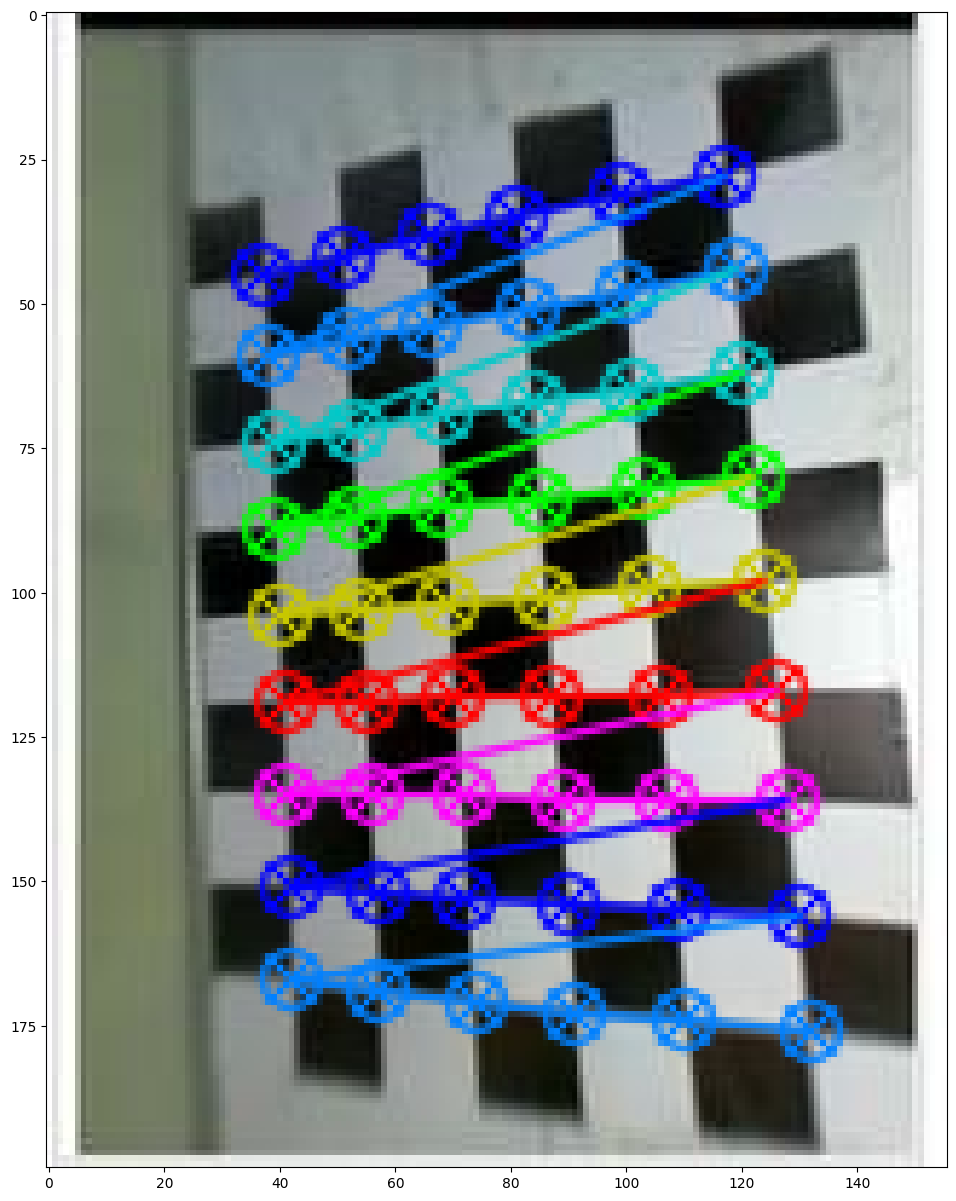

In [16]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt


CHECKERBOARD = (6, 9)


criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 50, 0.0005)


# Vector for 3D points
threedpoints = []

# Vector for 2D points
twodpoints = []


#  3D points real world coordinates
objectp3d = np.zeros((1, CHECKERBOARD[0]
                      * CHECKERBOARD[1],
                      3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:CHECKERBOARD[0],
                               0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None



images = glob.glob('/content/checkerboard2-156x200.jpg')

for filename in images:
    image = cv2.imread(filename)
    grayColor = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    ret, corners = cv2.findChessboardCorners(
                    grayColor, CHECKERBOARD,
                    cv2.CALIB_CB_ADAPTIVE_THRESH
                    + cv2.CALIB_CB_FAST_CHECK +
                    cv2.CALIB_CB_NORMALIZE_IMAGE)


    if ret == True:
        threedpoints.append(objectp3d)


        corners2 = cv2.cornerSubPix(
            grayColor, corners, (11, 11), (-1, -1), criteria)

        twodpoints.append(corners2)

        # Draw and display the corners
        image = cv2.drawChessboardCorners(image,
                                          CHECKERBOARD,
                                          corners2, ret)

    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(image),plt.show()

h, w = image.shape[:2]
flags = (
    cv2.CALIB_ZERO_TANGENT_DIST |
    cv2.CALIB_FIX_K3 |
    cv2.CALIB_FIX_K4 |
    cv2.CALIB_FIX_K5 |
    cv2.CALIB_FIX_K6
)


ret, matrix, distortion, r_vecs, t_vecs = cv2.calibrateCamera(
    threedpoints, twodpoints, grayColor.shape[::-1], None, None, flags=flags)


In [17]:
# Displaying required output for checkboard 2
print(" Camera matrix:")
print(matrix)

print("\n Distortion coefficient:")
print(distortion)

print("\n Rotation Vectors:")
print(r_vecs)

print("\n Translation Vectors:")
print(t_vecs)

print("\n Camera focal length (mm):")
print(((matrix[0][0] + matrix[1][1]) / 2) / 712.76)

 Camera matrix:
[[ 29.48687662   0.          55.22210274]
 [  0.          31.35904417 104.37504765]
 [  0.           0.           1.        ]]

 Distortion coefficient:
[[ 7.23860450e-04 -5.84488998e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]

 Rotation Vectors:
(array([[-0.01860459],
       [ 0.07488519],
       [-0.05522816]]),)

 Translation Vectors:
(array([[-1.2896259 ],
       [-4.04731779],
       [ 2.133034  ]]),)

 Camera focal length (mm):
0.04268331611766504
